In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
import sympy as sym
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
from scipy.optimize import least_squares

In [2]:
#defining the curve z = x^2 + y^2.
def z(x,y):
    term = x**2 + y**2
    return term

In [3]:
#This will generate random numbers between -8 and 8: these will be the (x,y) values.
def randGen():
    s1 = random.random()
    s2 = s1 - 0.5
    s3 = s2*16
    return s3

In [4]:
list = []

In [5]:
#Create the dataset.
for i in range(1600):
    x = randGen()
    y = randGen()
    list.append([x,y,z(x,y)])

In [6]:
X = np.array(list)

In [7]:
Xt = X.transpose()

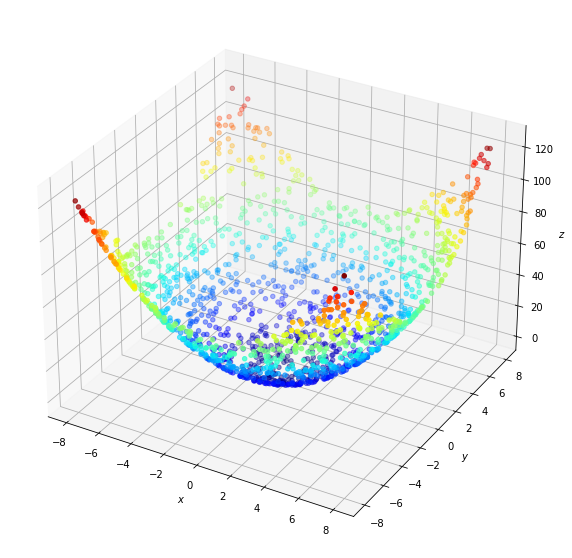

In [8]:
#Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xt[0],Xt[1],Xt[2],c=Xt[2],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

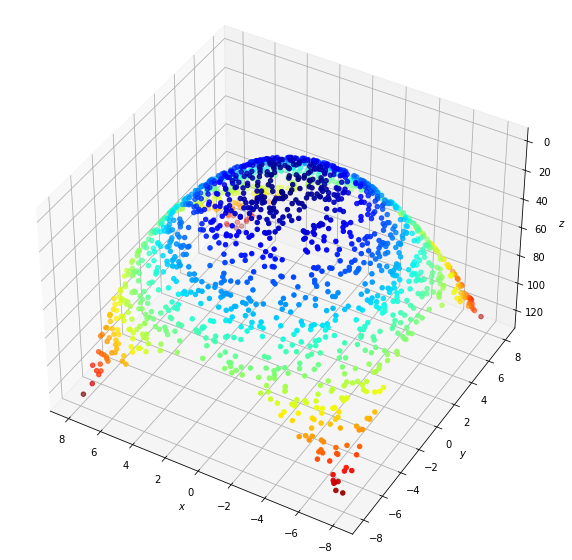

In [9]:
#Another angle of the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xt[0],Xt[1],Xt[2],c=Xt[2],cmap="jet")
ax.view_init(-140, 60)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [10]:
#mean center the data.

In [11]:
xmean = sum(Xt[0]/1600)
ymean = sum(Xt[1]/1600)
zmean = sum(Xt[2]/1600)

In [12]:
Xxt = [x-xmean for x in Xt[0]]
Xyt = [x-ymean for x in Xt[1]]
Xzt = [x-zmean for x in Xt[2]]

In [13]:
X2t = np.array([Xxt,Xyt,Xzt])

In [14]:
X2 = X2t.transpose()

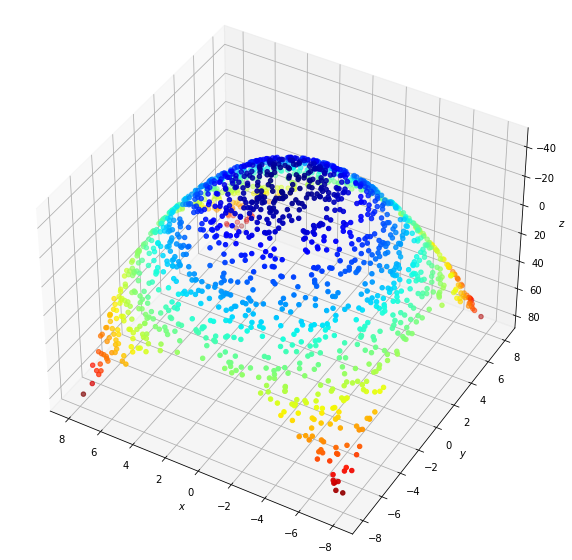

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X2t[0],X2t[1],X2t[2],c=Xt[2],cmap="jet")
ax.view_init(-140, 60)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [16]:
#rotate 30 degrees about the x-axis.
theta = np.pi/3
def XrotMat(theta):
    list = [[1.0,0.0,0.0],[0.0,np.cos(theta),-np.sin(theta)],[0.0,np.sin(theta),np.cos(theta)]]
    mat = np.array(list)
    return mat

In [17]:
listY = [XrotMat(theta)@X2[i] for i in range(X2.shape[0])]

In [18]:
Y = np.array(listY)

In [19]:
Yt = Y.transpose()

In [20]:
#Again, we mean center the data. (was the first time needed?)
xMean = sum(Yt[0]/1600)
yMean = sum(Yt[1]/1600)
zMean = sum(Yt[2]/1600)

In [21]:
Yxt = [x-xMean for x in Yt[0]]
Yyt = [x-yMean for x in Yt[1]]
Yzt = [x-zMean for x in Yt[2]]

In [22]:
Y2t = np.array([Yxt,Yyt,Yzt])

In [23]:
Y2 = Y2t.transpose()

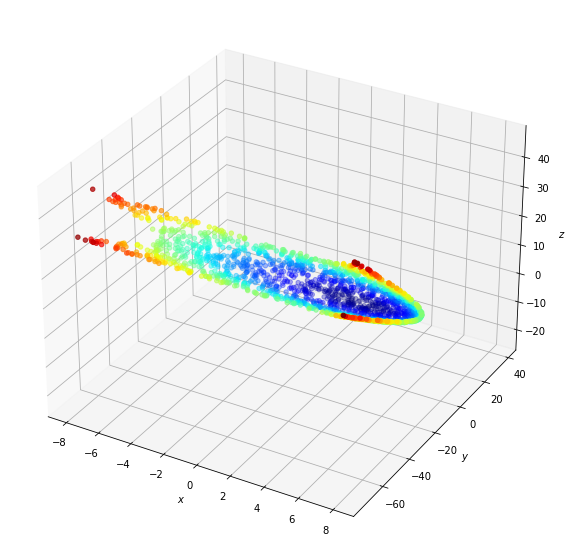

In [24]:
# Now we visualize the data. In principle, this is how the data could be given to us.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(Y2t[0],Y2t[1],Y2t[2],c=Xt[2],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

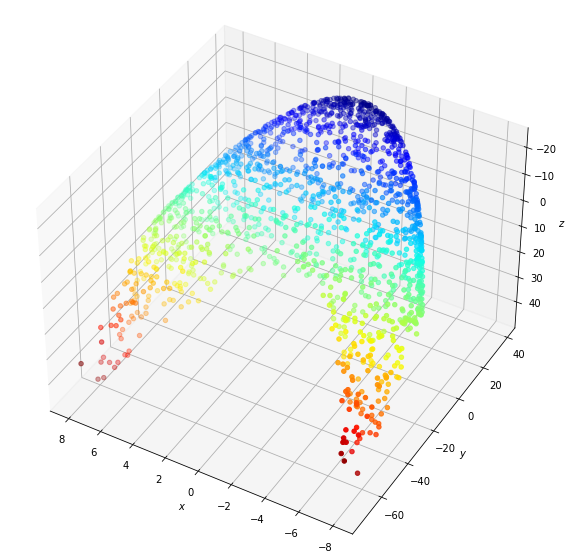

In [25]:
#Visualize the data from a better angle.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(Y2t[0],Y2t[1],Y2t[2],c=Xt[2],cmap="jet")
ax.view_init(-140, 60)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [26]:
#Since the data is mean-centered, we apply PCA. Then we look at singular values and principal components.
pca = PCA(n_components=3)
pca.fit(Y2)

PCA(n_components=3)

In [27]:
pca.singular_values_

array([1113.92473491,  191.07047166,  184.29592285])

In [28]:
Us = pca.components_
Us

array([[ 0.00115074, -0.86824984,  0.49612589],
       [ 0.72902557,  0.34031982,  0.593889  ],
       [-0.6844855 ,  0.36100505,  0.63336795]])

In [29]:
#Since the second and third singular values are approximately equal, the data may be well modeled as a surface
# of revolution. That is, it may be well modeled as a curve rotated about the principal component whose 
# corresponding singular value is the most dissimilar. In this case, the approximate axis of symmetry is the 
# first principal component:
u1 = Us[0]
u1

array([ 0.00115074, -0.86824984,  0.49612589])

In [30]:
#Let's graph this approximate axis of symmetry together with the datapoints.
yspace = np.linspace(-80,50,80+48)

In [31]:
def line(y):
    z = (u1[2])/(u1[1])*y
    x = (u1[0])/(u1[1])*y
    return [x,y,z]

In [32]:
lineList = [line(y) for y in yspace]

In [33]:
L = np.array(lineList)

In [34]:
Lt = L.transpose()

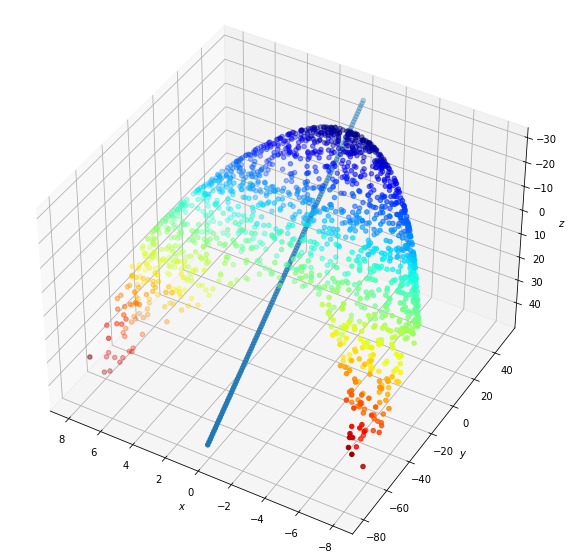

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(Y2t[0],Y2t[1],Y2t[2],c=Xt[2],cmap="jet")
ax.scatter(Lt[0],Lt[1],Lt[2])
ax.view_init(-140, 60)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [36]:
#Now we change coordinates via PCA: the axis of rotation will become the new x-axis.
Z = pca.transform(Y2)

In [37]:
Zt = Z.transpose()

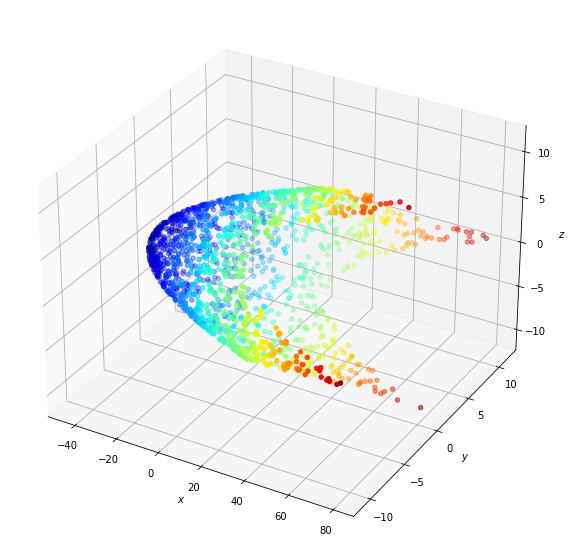

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(Zt[0],Zt[1],Zt[2],c=Xt[2],cmap="jet")
#ax.view_init(-140, 60)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [39]:
#Now we're going to rotate each datapoint to the (y,x) plane to approximate the rotated curve.
# It actually takes several minutes to run: presumably there's a much faster way.
def Xrotate(p,Xmat):
    a = sym.Symbol('a')
    b = sym.Symbol('b')
    c = sym.Symbol('c')
    XrotMat2 = np.array([[1,0,0],[0,a,b],[0,c,a]])
    testVec = XrotMat2@p
    testexp = sym.solve(testVec[2],(c))
    testangle = np.arctan(float(testexp[0]/a))
    term = Xmat(testangle)@p
    return term

In [40]:
planeList = [Xrotate(z,XrotMat) for z in Z]

In [41]:
planeData = np.array(planeList)

In [42]:
pdT = planeData.transpose()

In [43]:
#One issue with the method which we've chosen to do this is that some datapoints are to the left of the
# vertical axis. This is shown in the last "jet" colored plot. The subsequent blue plot is the plot where
# the left points are reflected about the vertical axis.
posList = [pt for pt in planeList if pt[1]>0]

In [44]:
negList = [pt for pt in planeList if pt[1]<0]

In [45]:
NegList = [np.array([pt[0],-pt[1],pt[2]]) for pt in negList]

In [46]:
posList.extend(NegList)

In [47]:
posPlaneData = np.array(posList)
ppDt = posPlaneData.transpose()

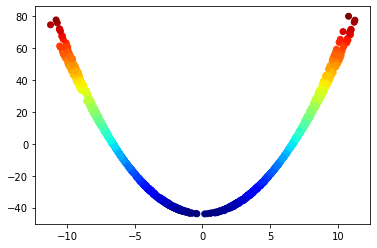

In [48]:
plt.scatter(pdT[1],pdT[0],c=Xt[2],cmap="jet")

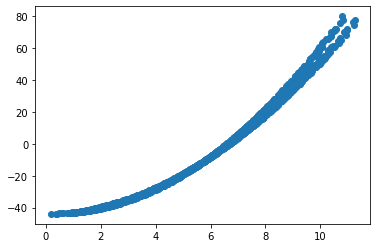

In [49]:
plt.scatter(ppDt[1],ppDt[0])

In [50]:
#Now let's fit a curve to there datapoints.
def func(x,r,t):
    return r*x**2 + t #+ s*x + t

In [51]:
popt, pcov = curve_fit(func, ppDt[1], ppDt[0])

In [52]:
popt

array([  0.99738479, -43.9303817 ])

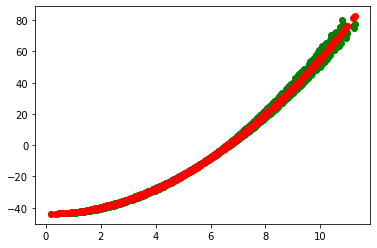

In [53]:
plt.scatter(ppDt[1], ppDt[0],color='green')
plt.scatter(ppDt[1], func(ppDt[1], *popt),color='red')

In [54]:
#The model is the following function rotated about the first principal component:
y = sym.Symbol('y')
sym.init_printing()
popt[0]*y**2 + popt[1]

In [55]:
#The perfect fit would have been y^2 instead of 0.99*y^2 (the offset is due to mean-centering the data): not bad!
# In principle we could now "shrink-wrap" the data: that is, send each datapoint to the nearest point on the
# surface of revolution.

In [56]:
# How good is the fit?
residuals = ppDt[0]- func(ppDt[1], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ppDt[0]-np.mean(ppDt[0]))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

In [57]:
# In the future, we will want to be careful about parameterizing the curve: this will offer us an advantage
# over kernel PCA. For now, we will just use y=u, x=x(y(u)).

In [58]:
def why(u):
    return u

def ex(u):
    return popt[0]*u**2 + popt[1]

In [59]:
def dsq(y,x,y0,x0):
    # remember x is the verical axis here.
    term = (y(u)-y0)**2 + (x(u)-x0)**2
    return term

In [60]:
# This is going to get the u-coordinate for us.
def projectToCurve(pt):
    if pt[0] < 0:
        newpt = np.array([-pt[0],pt[1]])
    else:
        newpt = pt
    def distSq(u): 
        term = (u-pt[0])**2 + (popt[0]*u**2 + popt[1]-pt[1])**2
        return term
    res = minimize_scalar(distSq)
    ans = np.abs(res.x)
    return ans

In [61]:
# This is going to get the theta coordinate for us.
def getTheta(pt):
    adj = pt[1]
    hyp = np.sqrt(pt[1]**2+pt[2]**2)
    if pt[2] >= 0:
        theta = np.arccos(adj/hyp)
    else:
        theta = 2*np.pi - np.arccos(adj/hyp)
    return theta

In [62]:
pdSt = np.array([pdT[1],pdT[0]])
pdS = pdSt.transpose()

In [63]:
def getUThetaCoords(i):
    u = projectToCurve(pdS[i])
    theta = getTheta(Z[i])
    return np.array([theta,u])

In [64]:
thetaUcoords = np.array([getUThetaCoords(i) for i in range(Z.shape[0])])

In [65]:
tUt = thetaUcoords.transpose()

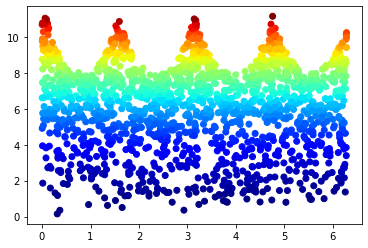

In [66]:
# Below is the 2-d representation of the data. theta is horizontal, u is vertical.
plt.scatter(tUt[0],tUt[1],c=Xt[2],cmap="jet")

In [67]:
def clean3dCoords(pt):
    theta = pt[0]
    u = pt[1]
    y = u*np.cos(theta)
    z = u*np.sin(theta)
    x = (popt[0]*u**2 + popt[1])
    pt3d = np.array([x,y,z])
    return pt3d

In [68]:
newcoords = np.array([clean3dCoords(x) for x in thetaUcoords])

In [69]:
ncT=newcoords.transpose()

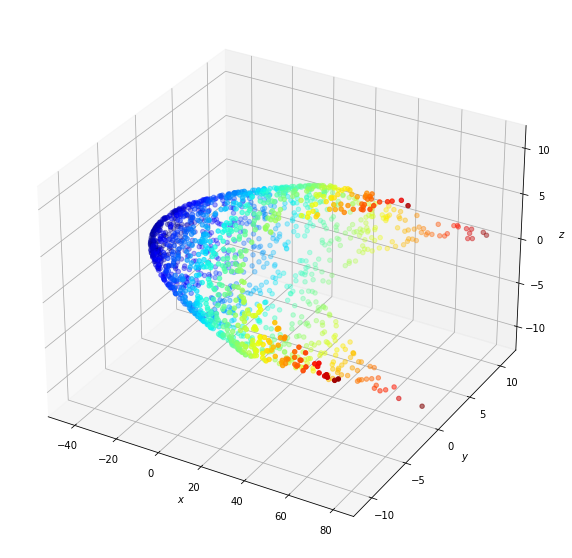

In [70]:
# From our 2-d representation, we should be able to recover the surface of revolution:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(ncT[0],ncT[1],ncT[2],c=Xt[2],cmap="jet")
#ax.view_init(-140, 60)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [71]:
# On the 2-d surface, we have a metric. ((f')^2+(g')^2)du^2 + f^2dv^2. x(u)=g, y=f*sin(theta), z=f*cos(theta).
# If we had found a regular parameterization (of the curve), the metric would just be: du^2 + f^2dv^2.